<a href="https://colab.research.google.com/github/Andru-1987/77695_data_science_i_flex/blob/main/04_clase/04_clase_en_vivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Data Treatment


In [14]:
import pandas as pd
import numpy as np

In [2]:
URL_DATASET = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

In [10]:
nombre_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [11]:
df = pd.read_csv(URL_DATASET, sep = "," , header=None, names=nombre_columns)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.replace(0, np.nan, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [20]:
(df.isna().mean() * 100).round(2).sort_values(ascending=False)

,0
Outcome,65.10
Insulin,48.70
SkinThickness,29.56
Pregnancies,14.45
BloodPressure,4.56
BMI,1.43
Glucose,0.65
DiabetesPedigreeFunction,0.00
Age,0.00


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.494673,3.217291,1.000,2.00000,4.0000,7.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,268.0,1.000000,0.000000,1.000,1.00000,1.0000,1.00000,1.00


In [33]:
import matplotlib.pyplot as plt

def generar_hist(df:pd.DataFrame) -> None:
    fig = plt.figure(figsize=(16,9))
    df.hist(bins=10, figsize=(16,9), layout=(3,3), color='skyblue',alpha=0.7, edgecolor='black')
    plt.suptitle('Graficos de distribucion', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


<Figure size 1600x900 with 0 Axes>

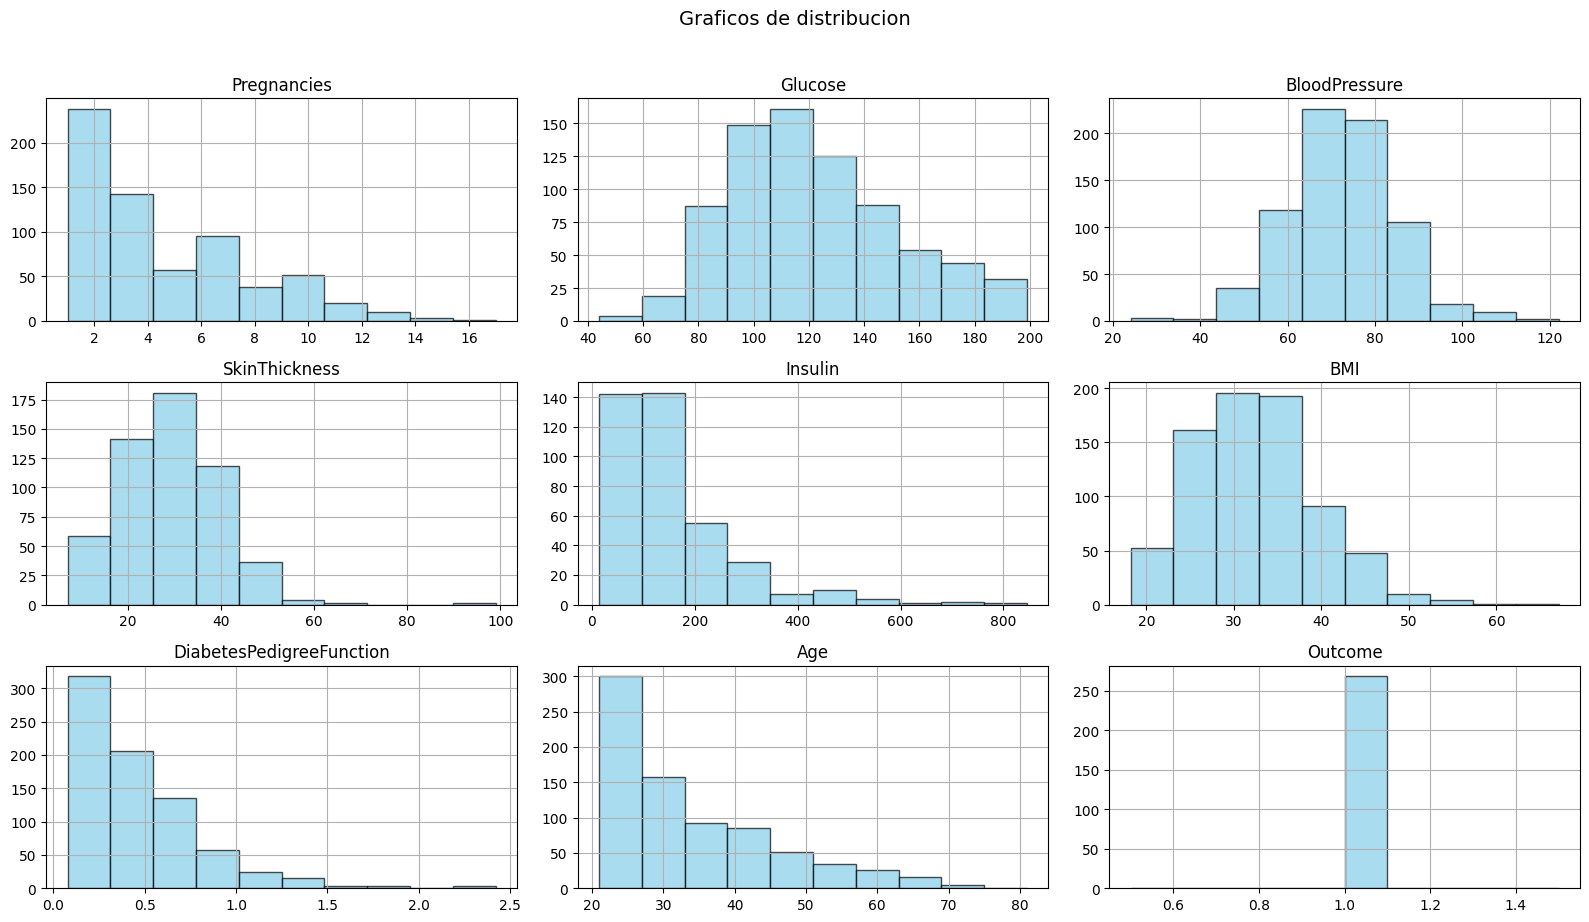

<Figure size 640x480 with 0 Axes>

In [34]:
generar_hist(df)

# Imputemos!!!

In [26]:
medianas = df.median()

In [27]:
df_imputaded_mediana = df.copy()

In [28]:
df_imputaded_mediana = df.fillna(medianas)

In [29]:
df_imputaded_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


<Figure size 1600x900 with 0 Axes>

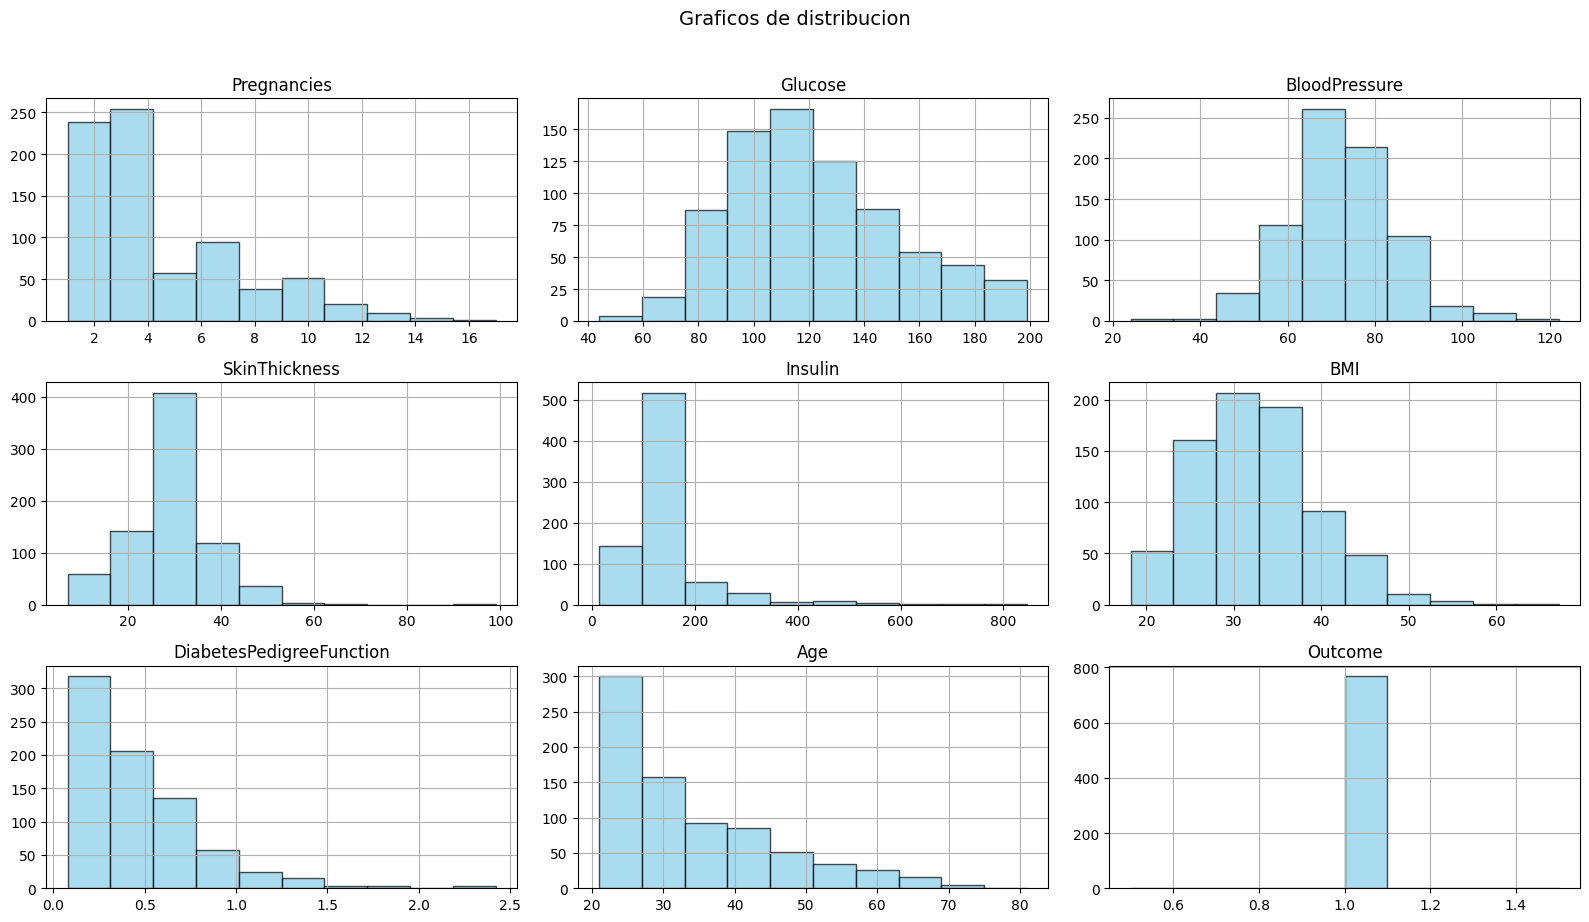

In [30]:
generar_hist(df_imputaded_mediana)

# Imputacion Inteligente

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge

In [35]:
columna_outcome = ['Outcome']
columna_simple_imputer = ['BMI','DiabetesPedigreeFunction','Age']
columnas_knn_imputer = ['Pregnancies', 'BloodPressure']
columnas_iteratives_imputer = ['Insulin', 'SkinThickness']

In [44]:
df_imputed = df.copy()

# Se llena con ceros, pues es el valor binario de no tiene diabetes
df_imputed[columna_outcome] = df_imputed[columna_outcome].fillna(0)


In [45]:
imputer_simple = SimpleImputer(strategy='median')
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])


In [46]:
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed[columnas_knn_imputer] = imputer_knn.fit_transform(df_imputed[columnas_knn_imputer])

In [47]:
imputer_iterative = IterativeImputer(
    estimator = BayesianRidge( max_iter = 500),
    max_iter=20,
    random_state=42,
    initial_strategy='median'
)
df_imputed[columnas_iteratives_imputer] = imputer_iterative.fit_transform(df_imputed[columnas_iteratives_imputer])


In [48]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<Figure size 1600x900 with 0 Axes>

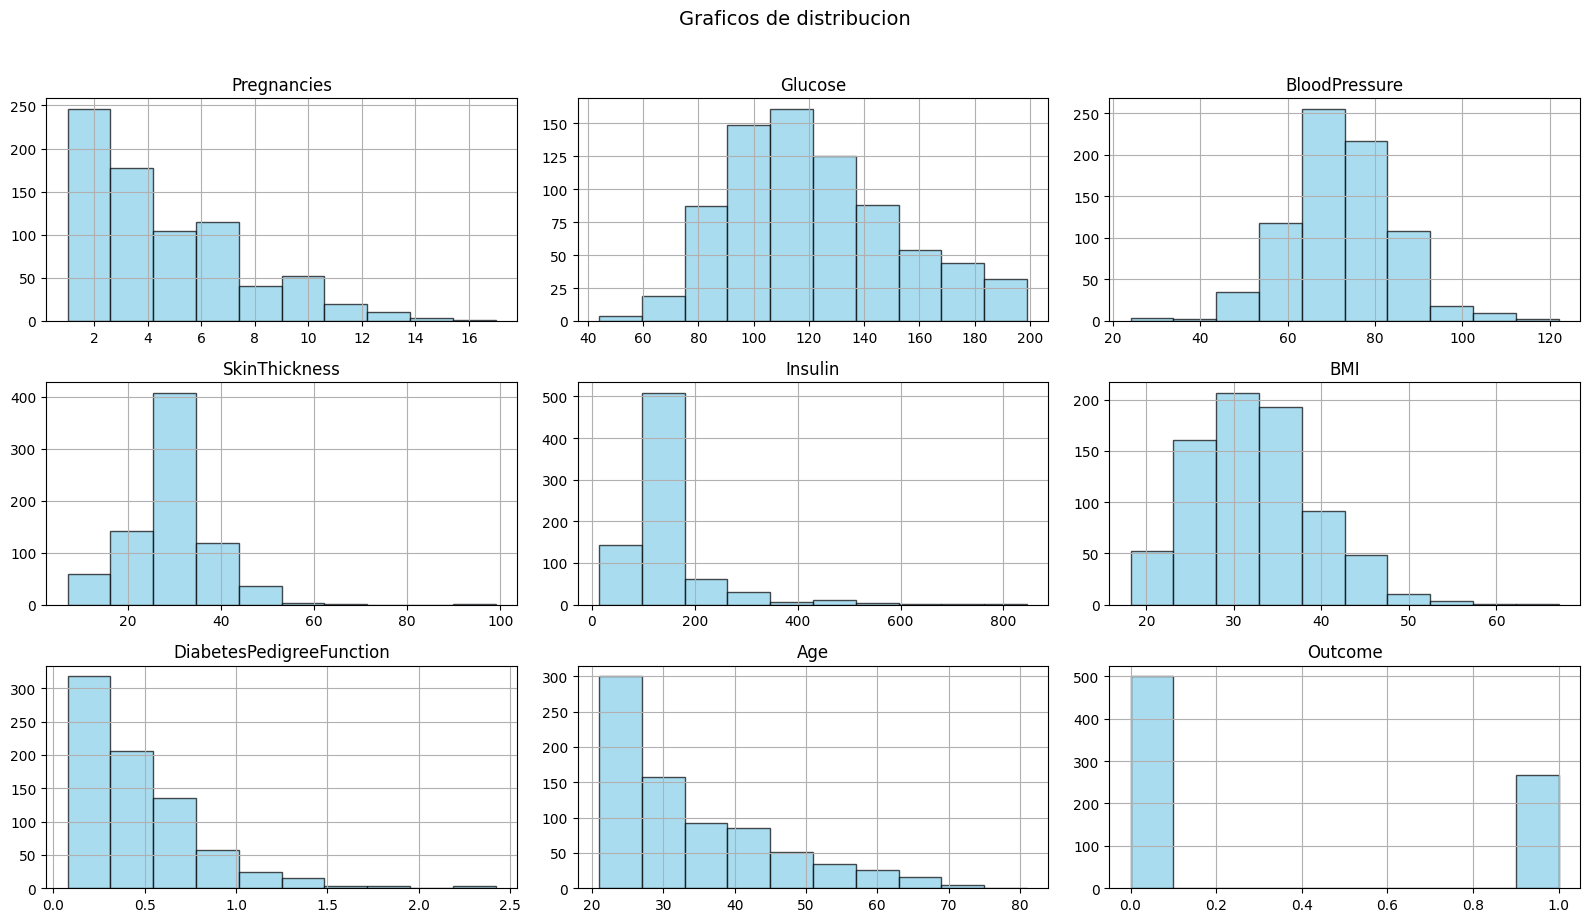

<Figure size 640x480 with 0 Axes>

In [49]:
generar_hist(df_imputed)

# Grafico en matplotlib

In [50]:
url_path = "https://raw.githubusercontent.com/Andru-1987/77695_data_science_i_flex/refs/heads/main/04_clase/storage/pune_1965_2002.csv"

lluvias_df = pd.read_csv(url_path, sep=",")

lluvias_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [51]:
lluvias_df['Annual'] = lluvias_df.sum(axis=1, numeric_only=True)
lluvias_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075,3228.394
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132,2865.588
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685,3489.184
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020,3054.237
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951,3708.022


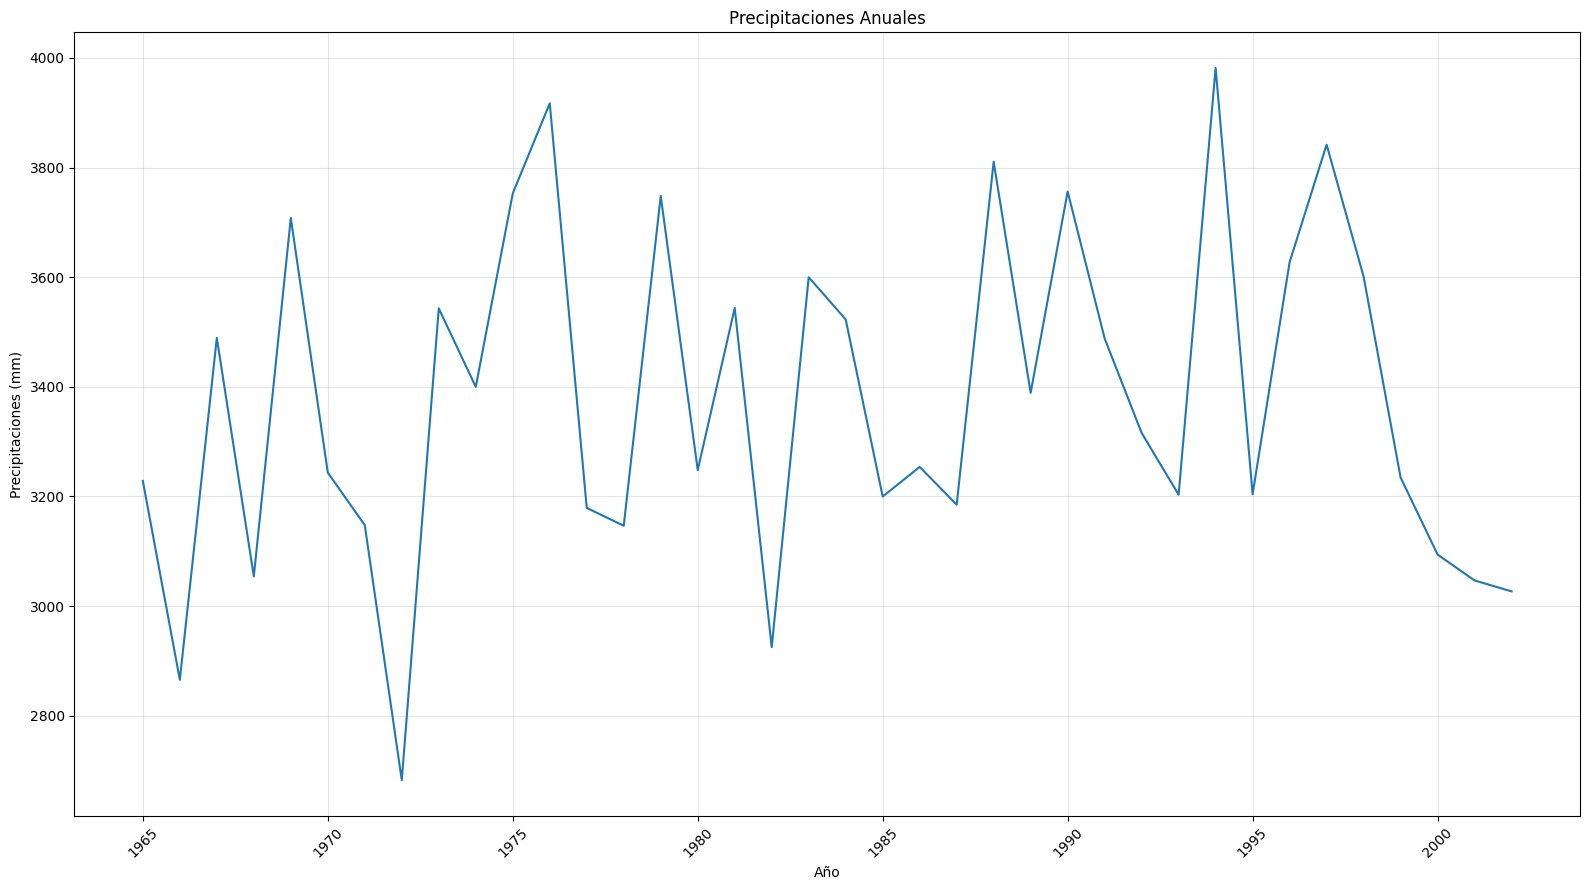

In [53]:
# grafico

plt.figure(figsize = (16,9))

plt.plot(
    lluvias_df.Year,
    lluvias_df.Annual
)


plt.title('Precipitaciones Anuales')
plt.xlabel('Año')
plt.ylabel('Precipitaciones (mm)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

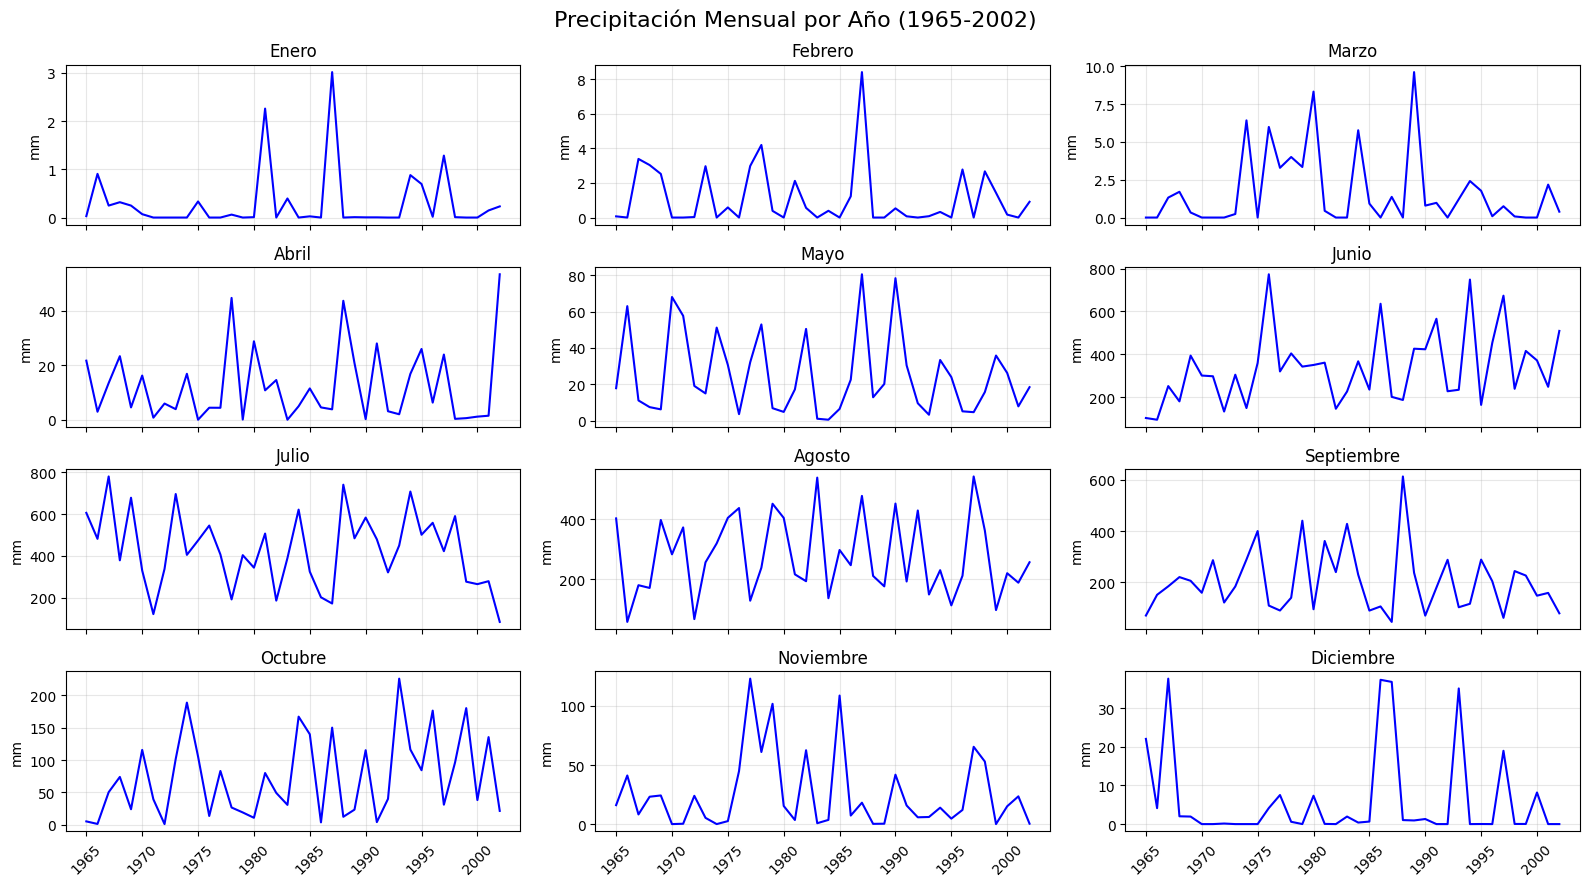

In [54]:
# Versión más simple para alumnos
fig, axes = plt.subplots(4, 3, figsize=(16, 9))

meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

meses_esp = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
             'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']


for i, (ax, mes_eng, mes_esp) in enumerate(zip(axes.flat, meses, meses_esp)):
    ax.plot(lluvias_df['Year'], lluvias_df[mes_eng], color='blue')
    ax.set_title(mes_esp)
    ax.set_ylabel('mm')
    ax.grid(True, alpha=0.3)

    # Rotar labels solo en los ejes de abajo
    if i >= 9:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.set_xticklabels([])  # Ocultar labels en ejes superiores

plt.suptitle('Precipitación Mensual por Año (1965-2002)', fontsize=16)
plt.tight_layout()
plt.show()

